<a href="https://colab.research.google.com/github/DirkFritz/finance_data_analysis/blob/main/index_analysis/ndx100_bestperformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [ ]:
ndx_prices_df = pd.read_csv('/content/drive/MyDrive/Entwicklung/IndexAnalyzer/ndxdata.csv')
ndx_prices_df = ndx_prices_df.drop(["Unnamed: 0"], axis=1)
ndx_prices_df

In [ ]:
nasdaq_df = pd.read_csv('/content/drive/MyDrive/Entwicklung/IndexAnalyzer/nasdaq_screener_1620482682649.csv')
nasdaq_df = nasdaq_df.set_index('Symbol')
nasdaq_df

In [4]:
def create_performance_record(stock_prices_df,nasdaq_df ):
  relative_performance_cols = ['Symbol','Name', 'Date1', 'Date2', 'Performance', 'Date3', 'Date4', 'Performance', 'Sector']
  performance_df = pd.DataFrame(columns=relative_performance_cols)
  compare_date1 = 20201005
  compare_date2 = 20210216
  compare_date3 = 20210216
  compare_date4 = 20210518
 

  for symbol in stock_prices_df["Symbol"].unique():
    price_data1 = stock_prices_df.loc[(stock_prices_df['DateTime'] == compare_date1) & (stock_prices_df['Symbol'] == symbol)]['Price'].iloc[0]
    price_data2 = stock_prices_df.loc[(stock_prices_df['DateTime'] == compare_date2) & (stock_prices_df['Symbol'] == symbol)]['Price'].iloc[0]
    price_data3 = stock_prices_df.loc[(stock_prices_df['DateTime'] == compare_date3) & (stock_prices_df['Symbol'] == symbol)]['Price'].iloc[0]
    price_data4 = stock_prices_df.loc[(stock_prices_df['DateTime'] == compare_date4) & (stock_prices_df['Symbol'] == symbol)]['Price'].iloc[0]
    #print(symbol,price_data1,price_data3,price_data3,price_data4 )
 
    
    data_record =[ [symbol,nasdaq_df.loc[symbol,"Name"],compare_date1, compare_date2, -100 + (price_data2/price_data1)*100,compare_date3, compare_date4, -100 + (price_data4/price_data3)*100,nasdaq_df.loc[symbol,"Sector"]]]
    performance_df = performance_df.append(pd.DataFrame(data_record, columns=relative_performance_cols))
    
  return performance_df
  


In [ ]:

performance_df = create_performance_record(ndx_prices_df,nasdaq_df)


performance_df



In [ ]:
X = performance_df.values[:,[4,7]]

X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset


Text(0, 0.5, 'costs')

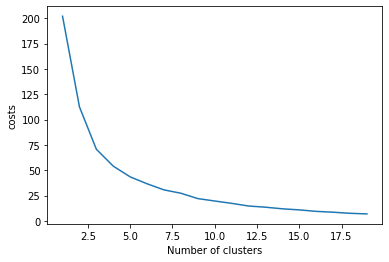

In [7]:
costs =[]
for i in range(1,20):
    k_means = KMeans(init="k-means++", n_clusters=i, n_init=12)
    k_means.fit(cluster_dataset)
    labels = k_means.labels_
    costs.append(k_means.inertia_)
#labels


k_means = KMeans(init="k-means++", n_clusters=6, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
performance_df["Labels"] = labels

plt.plot(range(1,20),costs)
plt.xlabel("Number of clusters")
plt.ylabel("costs")



In [8]:
performance_df

,Symbol,Name,Date1,Date2,Performance,Date3,Date4,Performance,Sector,Labels
0,ATVI,Activision Blizzard Inc. Common Stock,20201005,20210216,29.052369,20210216,20210518,-9.178744,Technology,2
0,ADBE,Adobe Inc. Common Stock,20201005,20210216,3.408857,20210216,20210518,-4.366099,Technology,4
0,AMD,Advanced Micro Devices Inc. Common Stock,20201005,20210216,6.279070,20210216,20210518,-18.501094,Technology,2
0,ALXN,Alexion Pharmaceuticals Inc. Common Stock,20201005,20210216,34.745763,20210216,20210518,12.767296,Health Care,5
0,ALGN,Align Technology Inc. Common Stock,20201005,20210216,90.769231,20210216,20210518,-3.422581,Health Care,1
...,...,...,...,...,...,...,...,...,...,...
0,VRSN,VeriSign Inc. Common Stock,20201005,20210216,-1.501560,20210216,20210518,8.651752,Technology,0
0,TMUS,T-Mobile US Inc. Common Stock,20201005,20210216,7.167680,20210216,20210518,10.628293,Public Utilities,0
0,ZM,Zoom Video Communications Inc. Class A Common ...,20201005,20210216,-8.518847,20210216,20210518,-28.486694,Consumer Services,2
0,WDAY,Workday Inc. Class A Common Stock,20201005,20210216,22.164444,20210216,20210518,-17.877542,Technology,2


In [9]:
performance_df.groupby('Labels').mean()

,Performance,Performance
Labels,,
0,3.539497,12.113826
1,90.040937,-11.203436
2,27.811175,-18.158351
3,148.193428,-42.892269
4,4.516753,-3.368647
5,33.786915,3.572064


In [12]:
performance_df[performance_df["Labels"]==4]

,Symbol,Name,Date1,Date2,Performance,Date3,Date4,Performance,Sector,Labels
0,ADBE,Adobe Inc. Common Stock,20201005,20210216,3.408857,20210216,20210518,-4.366099,Technology,4
0,AMZN,Amazon.com Inc. Common Stock,20201005,20210216,3.012909,20210216,20210518,-1.275182,Consumer Services,4
0,AAPL,Apple Inc. Common Stock,20201005,20210216,14.581894,20210216,20210518,-5.910736,Technology,4
0,BIIB,Biogen Inc. Common Stock,20201005,20210216,-1.748252,20210216,20210518,0.355872,Health Care,4
0,CHKP,Check Point Software Technologies Ltd. Ordinar...,20201005,20210216,-6.444956,20210216,20210518,0.958683,Technology,4
0,CTSH,Cognizant Technology Solutions Corporation Cla...,20201005,20210216,1.480000,20210216,20210518,-5.859940,Technology,4
0,CTAS,Cintas Corporation Common Stock,20201005,20210216,12.247478,20210216,20210518,-8.139474,Miscellaneous,4
0,EBAY,eBay Inc. Common Stock,20201005,20210216,20.398391,20210216,20210518,-1.368120,Consumer Services,4
0,EA,Electronic Arts Inc. Common Stock,20201005,20210216,11.037879,20210216,20210518,-2.210548,Technology,4
0,ISRG,Intuitive Surgical Inc. Common Stock,20201005,20210216,12.190210,20210216,20210518,3.034307,Health Care,4
